In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [325]:
df_train = pd.read_csv("./train.csv")
df_test = pd.read_csv("./test.csv")
df_test.shape

(1459, 80)

In [326]:
df_train.corr().iloc[-1]

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

In [327]:
newlist = sorted(df_train.corr().iloc[-1], reverse=True)
print(newlist)

[1.0, 0.7909816005838047, 0.7086244776126511, 0.640409197258349, 0.6234314389183598, 0.6135805515591944, 0.6058521846919166, 0.5606637627484452, 0.5337231555820238, 0.5228973328794967, 0.5071009671113867, 0.48636167748786213, 0.4774930470957107, 0.4669288367515242, 0.38641980624215627, 0.35179909657067854, 0.32441344456813076, 0.31933380283206614, 0.31585622711605577, 0.2841076755947784, 0.2638433538714063, 0.22712223313149718, 0.214479105546969, 0.1682131543007415, 0.11144657114291048, 0.09240354949187278, 0.04643224522381936, 0.04458366533574792, -0.011378121450215216, -0.016844154297359294, -0.02118957964030379, -0.021916719443431112, -0.02560613000068015, -0.028922585168730426, -0.0778558940486776, -0.08428413512659523, -0.12857795792595636, -0.1359073708421417]


In [328]:
#相関高い
#OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd

In [329]:
#X_train = df_train.loc[:].values
#X_train = df_train.drop(['Id','SalePrice'], axis=1)
X_test = df_test.drop('Id', axis=1)

In [330]:
#"MSSubClass","MSZoning","LotFrontage","LotArea","Street","Alley","LotShape","LandContour","Utilities","LotConfig","LandSlope","Neighborhood"	Condition1	Condition2	BldgType	HouseStyle	OverallQual	OverallCond	YearBuilt	YearRemodAdd	RoofStyle	RoofMatl	Exterior1st	Exterior2nd	MasVnrType	MasVnrArea	ExterQual	ExterCond	Foundation	BsmtQual	BsmtCond	BsmtExposure	BsmtFinType1	BsmtFinSF1	BsmtFinType2	BsmtFinSF2	BsmtUnfSF	TotalBsmtSF	Heating	HeatingQC	CentralAir	Electrical	1stFlrSF	2ndFlrSF	LowQualFinSF	GrLivArea	BsmtFullBath	BsmtHalfBath	FullBath	HalfBath	BedroomAbvGr	KitchenAbvGr	KitchenQual	TotRmsAbvGrd	Functional	Fireplaces	FireplaceQu	GarageType	GarageYrBlt	GarageFinish	GarageCars	GarageArea	GarageQual	GarageCond	PavedDrive	WoodDeckSF	OpenPorchSF	EnclosedPorch	3SsnPorch	ScreenPorch	PoolArea	PoolQC	Fence	MiscFeature	MiscVal	MoSold	YrSold	SaleType	SaleCondition
X_train = df_train.drop(["Id","SalePrice"],axis=1)


In [331]:
#X_train = df_train.loc[:,["OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF","FullBath","TotRmsAbvGrd","YearBuilt","YearRemodAdd"]].values
#y = df.loc[:,["SalePrice"]].values
y_train = df_train['SalePrice'].values
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [332]:
df_train.isnull().sum()[df_train.isnull().sum()>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [333]:
#X_train = X_train.drop(['PoolQC','MiscFeature',"Alley","Fence"], axis=1)

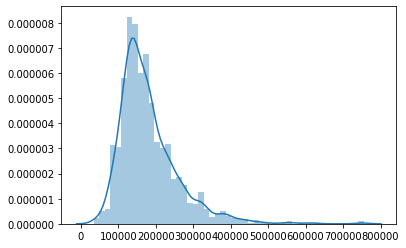

In [334]:
a = sns.distplot(y_train)
plt.show()

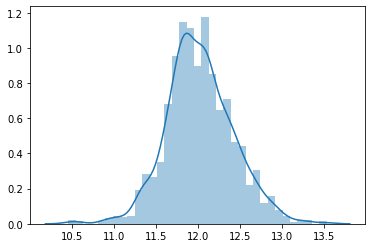

In [335]:
y_train_log = np.log(y_train)
a = sns.distplot(y_train_log)
plt.show()

In [369]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_std = scaler.transform(X_train)

ValueError: could not convert string to float: 'RL'

In [353]:
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_std, y_train_log)

C:\Users\world\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [354]:
#rfc = RandomForestRegressor()

# fit関数でモデル作成
#rfc.fit(X_train, y_train_log)

In [355]:
X_test = df_test.loc[:,["OverallQual","GarageCars","GrLivArea","GarageArea","TotalBsmtSF","1stFlrSF","FullBath","TotRmsAbvGrd","YearBuilt","YearRemodAdd"]]
print(X_test.isnull().sum())
print(type(X_test))

# 学習済みのモデルから予測した結果をセット
#y_test_pred = rfc.predict(X_test)
#print(y_test_pred)
#y_test_pred.shape

OverallQual     0
GarageCars      1
GrLivArea       0
GarageArea      1
TotalBsmtSF     1
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>


In [356]:
print(X_test.head())

   OverallQual  GarageCars  GrLivArea  GarageArea  TotalBsmtSF  1stFlrSF  \
0            5         1.0        896       730.0        882.0       896   
1            6         1.0       1329       312.0       1329.0      1329   
2            5         2.0       1629       482.0        928.0       928   
3            6         2.0       1604       470.0        926.0       926   
4            8         2.0       1280       506.0       1280.0      1280   

   FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  
0         1             5       1961          1961  
1         1             6       1958          1958  
2         2             6       1997          1998  
3         2             7       1998          1998  
4         2             5       1992          1992  


In [357]:
list = df_test.isnull().sum()[df_test.isnull().sum()>0].index.tolist() 
df_test[list].dtypes.sort_values()

TotalBsmtSF     float64
BsmtUnfSF       float64
BsmtFinSF2      float64
BsmtFinSF1      float64
GarageYrBlt     float64
BsmtFullBath    float64
GarageCars      float64
BsmtHalfBath    float64
GarageArea      float64
LotFrontage     float64
MasVnrArea      float64
GarageQual       object
GarageCond       object
GarageType       object
PoolQC           object
FireplaceQu      object
Fence            object
Functional       object
GarageFinish     object
MSZoning         object
MiscFeature      object
BsmtFinType2     object
BsmtFinType1     object
BsmtExposure     object
BsmtCond         object
BsmtQual         object
MasVnrType       object
Exterior2nd      object
Exterior1st      object
Utilities        object
Alley            object
KitchenQual      object
SaleType         object
dtype: object

In [358]:
print(X_test.isnull().sum())

OverallQual     0
GarageCars      1
GrLivArea       0
GarageArea      1
TotalBsmtSF     1
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
dtype: int64


In [359]:
#X_test = X_test.fillna(0)
garagecars = X_test["GarageCars"].fillna(0)
X_test["GarageCars"] = garagecars
garagearea = X_test["GarageCars"].fillna(0)
X_test["GarageArea"] = garagearea
total = X_test["TotalBsmtSF"].fillna(0)
X_test["TotalBsmtSF"] = total

In [360]:
print(X_test.isnull().sum())

OverallQual     0
GarageCars      0
GrLivArea       0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
dtype: int64


In [361]:
print(X_test.head())

   OverallQual  GarageCars  GrLivArea  GarageArea  TotalBsmtSF  1stFlrSF  \
0            5         1.0        896         1.0        882.0       896   
1            6         1.0       1329         1.0       1329.0      1329   
2            5         2.0       1629         2.0        928.0       928   
3            6         2.0       1604         2.0        926.0       926   
4            8         2.0       1280         2.0       1280.0      1280   

   FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  
0         1             5       1961          1961  
1         1             6       1958          1958  
2         2             6       1997          1998  
3         2             7       1998          1998  
4         2             5       1992          1992  


In [362]:
# 学習済みのモデルから予測した結果をセット
y_test_pred = rfr.predict(X_test)
print(y_test_pred)
y_test_pred.shape
y_pred = np.exp(y_test_pred)
print(y_pred)

[12.79562569 12.79562569 12.90175403 ... 12.85333006 12.63392442
 12.82334757]
[360636.45891865 360636.45891865 401014.96907411 ... 382058.89860196
 306791.73714596 370773.84309469]


In [363]:
#from sklearn.metrics import mean_squared_error as mse
#print('test: %.3f' % (mse(y_train, rfc.predict(X_train)) ** (1/2)))

In [364]:
from sklearn.metrics import accuracy_score
#accuracy_score(y_test, y_test_pred)

In [365]:
df_test["SalePrice"] = y_pred

In [366]:
df_test.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,360636.458919
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,360636.458919
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,401014.969074
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,401014.969074
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,401014.969074
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,401014.969074
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal,401014.969074
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,401014.969074
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,382058.898602
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal,382058.898602


In [367]:
df_test[["Id","SalePrice"]].head()

,Id,SalePrice
0,1461,360636.458919
1,1462,360636.458919
2,1463,401014.969074
3,1464,401014.969074
4,1465,401014.969074


In [368]:
df_test[["Id","SalePrice"]].to_csv("submission.csv",index=False)